Using the **NYC Taxi and Limousine Commission (TLC)** Yellow Taxi dataset from June 2017, we will try to solve following questions?

1. Imagine that you decide to drive a taxi for 10 hours each week to earn a little extra money. Explain how you would approach maximizing your income as a taxi driver.

2. If you could enrich the dataset, what would you add?  Is there anything in the dataset that you don’t find especially useful?

To answer the first question we can use TLC Yellow Taxi Dataset to 
1. Build a summary statistics of the demand, fare, duration, and transition probabilities for different location and times across New York City. 
2. Use linear model to understand which features best predict demand
3. Finally, use a reinforcement learning model to maximize the income (for individual driver) based on a set of summary statistics.


## Read, Understand, and Clean Data 
First, read the dataset and understand the features and their statistics.
+ Import python libraries
+ Read the data file and disply the feature and their statistic
+ Remove any row with null value as well as outliers


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn style to matplotlib
plt.style.use('seaborn-whitegrid')


In [2]:
# read the data from the file
taxi_df = pd.read_csv('yellow_tripdata_2017-06.csv')
#taxi_df = pd.read_csv('yellow.csv', nrows=5000)
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,21.5,1.0,0.5,0.00,0.0,0.3,23.30
3,2,2017-06-29 15:52:35,2017-06-29 16:03:27,6,1.43,1,N,142,48,1,8.5,1.0,0.5,0.88,0.0,0.3,11.18
4,1,2017-06-01 00:00:00,2017-06-01 00:03:43,1,0.60,1,N,140,141,1,4.5,0.5,0.5,2.00,0.0,0.3,7.80


**Check for missing data and remove them if any**

In [3]:
print(taxi_df.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [4]:
print('Data size before removing : %d' % len(taxi_df))
taxi_df = taxi_df.dropna(how = 'any', axis = 'rows')
print('Data size after removing : %d' % len(taxi_df))

Data size before removing : 9656993
Data size after removing : 9656993


In [5]:
# Display the statistic of the features
taxi_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06
mean,1.546961e+00,1.623943e+00,2.978617e+00,1.045527e+00,1.626235e+02,1.607379e+02,1.334040e+00,1.328727e+01,3.413314e-01,4.972247e-01,1.878480e+00,3.376697e-01,2.996046e-01,1.664632e+01
std,4.977898e-01,1.264608e+00,5.704095e+00,5.665036e-01,6.675223e+01,7.047343e+01,4.929622e-01,2.151675e+02,4.623294e-01,7.625157e-02,2.696221e+00,2.022799e+00,1.441594e-02,2.153387e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.500000e+02,-5.056000e+01,-5.000000e-01,-7.400000e+01,-1.250000e+01,-3.000000e-01,-5.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.185000e+01
75%,2.000000e+00,2.000000e+00,3.100000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.817000e+01
max,2.000000e+00,9.000000e+00,9.496980e+03,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.304618e+05,2.250000e+01,1.400000e+02,4.440000e+02,9.900000e+02,1.000000e+00,6.304631e+05


The major insight we can draw from the data description:-
1. The minimal fare_amount (and other monetary fields) is negative. This might be due to refund. 
2. The maximum number of passenger in the data is 9. However, a taxi can have max 6 passenger.

We will drop them as they can be considered an outliers.


In [6]:
print('Data size before removing : %d' % len(taxi_df))
taxi_df = taxi_df[taxi_df.fare_amount>=0]
taxi_df = taxi_df[taxi_df.extra>=0]
taxi_df = taxi_df[taxi_df.passenger_count<=6]
print('Data size after removing: %d' % len(taxi_df))

Data size before removing : 9656993
Data size after removing: 9652199


### Feature Generation

The next goal is to build a feature set. 
To understand the demand of taxi based on day of the week, time, and location, let's build a set of summary statistics related to the fare information by grouping based on day of the week, hour, pickup location, and dropoff location.

This give us the idea on which route (pick off to drop off location) has higher demand based on which day of the week and time (hour of the day).


In [7]:
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df.tpep_pickup_datetime)
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df.tpep_dropoff_datetime)

taxi_df['hour'] = taxi_df['tpep_pickup_datetime'].apply(lambda x: x.hour)
taxi_df['day'] = taxi_df['tpep_pickup_datetime'].apply(lambda x: x.weekday())
taxi_df['trip_duration'] = (taxi_df['tpep_dropoff_datetime']-taxi_df['tpep_pickup_datetime']).astype('timedelta64[m]')
taxi_df.head()

taxi_summary = taxi_df.groupby(['day', 'hour','PULocationID', 'DOLocationID']).agg({'VendorID':['count'],'passenger_count':['sum'],'trip_distance':['mean'],'trip_duration':['mean'], 'total_amount':['mean']}).reset_index()
taxi_summary.columns = ['day','hour', 'PULocationID', 'DOLocationID', 'trip_count', 'passenger_count', 'trip_distance','trip_duration','total_amount']
taxi_summary.head()

,day,hour,PULocationID,DOLocationID,trip_count,passenger_count,trip_distance,trip_duration,total_amount
0,0,0,1,1,1,2,0.000000,0.000000,131.30
1,0,0,2,186,1,2,18.400000,30.000000,65.56
2,0,0,4,4,6,12,0.528333,3.666667,23.05
3,0,0,4,24,1,1,7.300000,16.000000,27.80
4,0,0,4,33,1,1,4.300000,9.000000,16.30


### Feature Selection
Feature Selection is the process of selecting the attributes that can make the predicted variable more accurate or eliminating those attributes that are irrelevant and can decrease the model accuracy and quality.

Data and feature correlation is considered one of the important step in the feature selection phase of the data pre-processing especially if the data type for the features is continuous.

Data Correlation helps to understand the relationship between multiple variables and attributes in the dataset. Using Correlation, you can get some insights such as:
+ One or multiple attributes depend on another attribute or a cause for another attribute.
+ One or multiple attributes are associated with other attributes.

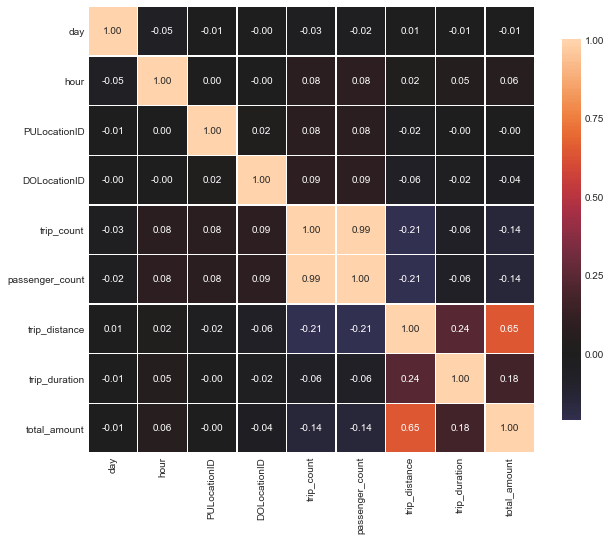

In [8]:
def correlation_heatmap(final_dataset):
    correlations = final_dataset.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

correlation_heatmap(taxi_summary)

From the correlation heatmap, we can see that there is positive correlation between total amount and trip duration,  total distance, hour of the day and day of the week.

We can plot the pairwise plot to visualize the correlation.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


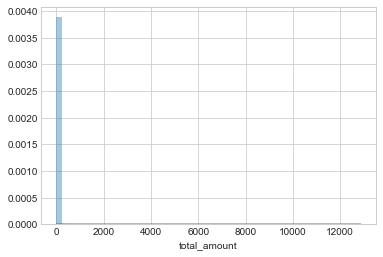

In [9]:
#sns.pairplot(taxi_summary)
sns.distplot(taxi_summary['total_amount'])

To build the regression model, we can start with variable that have positive correlation


In [10]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing


#X = taxi_summary[['day','hour', 'PULocationID', 'DOLocationID', 'trip_count', 'passenger_count', 'trip_distance','trip_duration','total_amount']]
X = taxi_summary[['day', 'hour', 'trip_distance','trip_duration','trip_count','passenger_count', 'PULocationID', 'DOLocationID']]

y = taxi_summary['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# scaler = preprocessing.MinMaxScaler()
# train_scaled = scaler.fit_transform(X_train)
# test_scaled = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

#plt.scatter(y_test,predictions)

ltrain = np.sqrt(metrics.mean_squared_error(y_pred_train, y_train))
print("Train: ", ltrain)


ltest = np.sqrt(metrics.mean_squared_error(y_pred_test, y_test))
print("Test : ", ltest)


rf = RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

#plt.scatter(y_test,predictions)

ltrain = np.sqrt(metrics.mean_squared_error(y_pred_train, y_train))
print("Train: ", ltrain)


ltest = np.sqrt(metrics.mean_squared_error(y_pred_test, y_test))
print("Test : ", ltest)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Train:  19.713661665946407
Test :  8.305831311676869


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train:  6.51515522892694
Test :  11.129217868727205


Here we have a revenue predicition model that perform okay.

Now, we need to 